In [6]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
path = '/gdrive/MyDrive/ML/data/'

In [9]:
raw_data = pd.read_csv(path + 'Chu.csv')
raw_data.head(7)

,Size,Price
0,721.82,1480000
1,543.69,830000
2,851.72,2060000
3,931.02,2410000
4,552.77,860000
5,654.79,1260000
6,510.77,680000


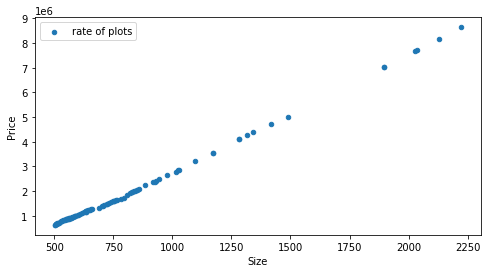

In [10]:
raw_data.plot(kind='scatter',x='Size',y='Price',label= 'rate of plots',figsize=(8,4))

In [11]:
data= (raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head(2)


,Size,Price
0,-0.054820,-0.063773
1,-0.158528,-0.144922


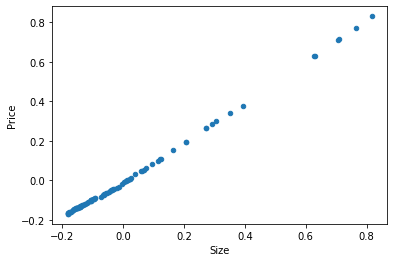

In [12]:
data.plot(kind='scatter',x='Size',y='Price',figsize=(6,4))

In [13]:
data.shape

(97, 2)

In [14]:
data.insert(0,'bias',1)
data.head()

,bias,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


In [15]:
cols = data.shape[1]
print(cols)

3


In [16]:
x = data.iloc[:,0:cols-1]

In [17]:
y = data.iloc[:,cols-1:cols]

In [18]:
theta = np.matrix([3,6])

In [19]:
x = np.matrix(x)

In [20]:
y = np.matrix(y)

In [21]:
x.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [41]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [42]:
computeError(x,y,theta)

5.132229948179237

In [43]:
line_model = (x*theta.T)

Text(0.5, 1.0, 'Initial Model Vs Data')

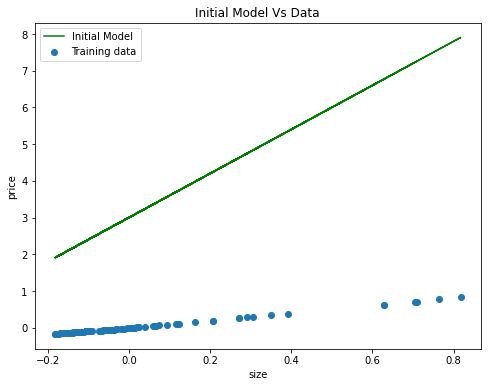

In [55]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(data.Size,data.Price,label="Training data")
ax.plot(data.Size,line_model,'g',label="Initial Model")
ax.legend()
ax.set_xlabel('size')
ax.set_ylabel('price')
ax.set_title('Initial Model Vs Data')

In [51]:
learn_rate = 1
iters = 350
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape)) 
  parameters = theta.shape[1]              
  cost = []                                

  for i in range(iters):                   
    error = (x*theta.T)-y                  

    for j in range(parameters):             
      gradient = np.multiply(error,x[:,j])
      temp[0,j]= theta[0,j] - ((learn_rate/len(x))*np.sum(gradient))

    theta= temp            
    cost_iter = computeError(x,y,theta)
    cost.append(cost_iter) 
  return theta,cost

In [52]:
final_theta,cost = gradientDescent(x,y,theta,learn_rate,iters)

In [53]:
print(final_theta)

[[2.73549797e-16 9.83386677e-01]]


In [54]:
print(cost)

[0.5703051140593284, 0.5144461382969399, 0.46405883863649927, 0.41860723605304234, 0.3776078534442059, 0.34062457279487657, 0.30726399610921057, 0.2771712607633973, 0.2500262647663031, 0.22554026177539255, 0.20345278964848332, 0.18352889985977064, 0.16555665830890753, 0.14934489093878497, 0.13472115018173123, 0.1215298806028428, 0.10963076422805514, 0.0988972279559027, 0.08921509717603063, 0.08048138127274912, 0.07260317809480772, 0.06549668573803141, 0.059086311128967735, 0.053303865927384654, 0.0480878411942848, 0.04338275310994624, 0.03913855278227096, 0.03531009386746378, 0.031856652340024195, 0.028741493303755705, 0.025931480235881325, 0.023396722507722695, 0.021110257432554895, 0.019047763458521366, 0.01718730145578885, 0.015509081345966022, 0.013995251591379688, 0.012629709304967193, 0.011397928960888653, 0.01028680788382235, 0.009284526873384125, 0.0083804244811071, 0.0075648836026426325, 0.006829229178842817, 0.0061656359175519615, 0.005567045054526774, 0.005027089268055652, 0

In [49]:
final_model = x* final_theta.T

Text(0.5, 1.0, 'Final_model Vs Training Data')

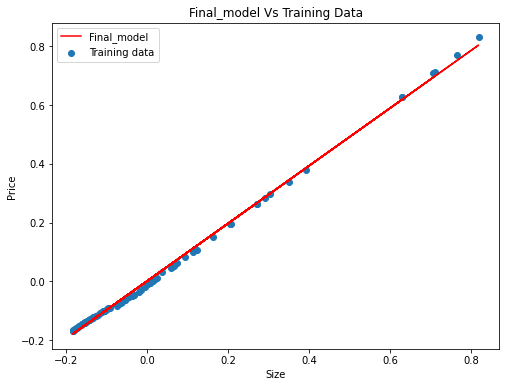

In [50]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(data.Size,final_model,'r',label="Final_model")
ax.scatter(data.Size,data.Price,label="Training data")
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Final_model Vs Training Data')

In [56]:
from sklearn.metrics import mean_absolute_error

Error = mean_absolute_error(final_model,y)
Accuracy = 1 - Error

print('Error = {} %'.format((round(Error*100,2))))
print('Accuracy = {} %'.format((round(Accuracy*100,2))))

Error = 0.94 %
Accuracy = 99.06 %


In [57]:
def predict(new_theta,accuracy):
  size = float(input("Enter the size of the house in Sqt:"))
  size = (size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
  price = (new_theta[0,0] + (new_theta[0,1]*size))
  Predicted_price = (price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
  Price_at_max_Accuracy = (Predicted_price*(1/accuracy))
  Price_range = Price_at_max_Accuracy - Predicted_price
  return Predicted_price, Price_range

In [59]:
Predicted_price, Price_range = predict(final_theta,Accuracy)
print('Your house cost is '+str(round(Predicted_price*(1/100000), 2))+' Lakhs (+ or -) '+str(round(Price_range, 2)))

Enter the size of the house in Sqt:946
Your house cost is 25.87 Lakhs (+ or -) 24675.62
